In [10]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  5 10:43:35 2020

@author: DELL
"""




from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.utils import np_utils 
from keras.datasets import mnist

data_path = '/content/drive/My Drive/Colab Notebooks/data'
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=20

# Define the number of classes
num_classes = 3

#labels_name={'cats':0,'dogs':1,'horses':2}
#labels_name={'left':0,'right':1,'center':2}
labels_name={'center':0,'left':1,'right':2}

img_data_list=[]
labels_list = []

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)
		labels_list.append(label)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

# 5. Định nghĩa model 
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3 
# dùng hàm relu làm activation và chỉ rõ input_shape cho layer đầu tiên 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
# Thêm Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu'))
# Thêm Max pooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
# Thêm Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
# Thêm Max pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
# Flatten layer chuyển từ tensor sang vector 
model.add(Flatten())
# Thêm Fully Connected layer với 64 nodes và dùng hàm relu 
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(num_classes, activation='softmax'))
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function. 
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

# 7. Thực hiện train model với data 
#hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=num_epoch, verbose=1)
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=num_epoch, verbose=1)
#hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=num_epoch, verbose=1)

# 8. Vẽ đồ thị loss, accuracy của training set và validation set 
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
fig.savefig('/loss.jpg')


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
fig.savefig('/accuracy.jpg')


# 9. Đánh giá model với dữ liệu test set 
score = model.evaluate(X_test, y_test, verbose=0) 
print(score)

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])
model.save('my_model.h5')
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

"""
from keras.models import load_model
# load model
model.load_weights('model.h5')

# 10. Dự đoán ảnh 
test_image = cv2.imread('/content/drive/My Drive/Colab Notebooks/person.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
test_image = test_image.reshape(1,128,128,1)
print(model.predict(test_image))
print(model.predict_classes(test_image))

print(model.predict_classes(test_image))
for dataset in data_dir_list:
  #print(dataset)
  if labels_name[dataset]==model.predict_classes(test_image)[0]:
    print("Day la:"+dataset)
    break
plt.imshow(test_image.reshape(128,128), cmap='gray')

"""






Loading the images of dataset-left



KeyboardInterrupt: ignored

In [1]:
!pip install  tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 104kB/s 
     |████████████████████████████████| 491kB 57.0MB/s 
     |████████████████████████████████| 3.2MB 49.0MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
print (hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [0]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 93kB/s 
     |████████████████████████████████| 491kB 53.0MB/s 
     |████████████████████████████████| 3.2MB 50.6MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


[[7.6570594e-10 1.0000000e+00 5.2022441e-22]]
[1]
[1]
Day la:left


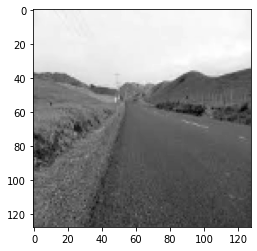

In [11]:
from keras.models import load_model
# load model
model.load_weights('/content/drive/My Drive/Colab Notebooks/model/model.h5')

# 10. Dự đoán ảnh 

test_image = cv2.imread('/content/drive/My Drive/Colab Notebooks/test.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
test_image = test_image.reshape(1,128,128,1)

print(model.predict(test_image))
print(model.predict_classes(test_image))

print(model.predict_classes(test_image))
for dataset in data_dir_list:
  #print(dataset)
  if labels_name[dataset]==model.predict_classes(test_image)[0]:
    print("Day la:"+dataset)
    break
    
plt.imshow(test_image.reshape(128,128), cmap='gray')